# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#store base url and units of measurement
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#create empty lists which will populate our dateframe
name = []
cloud = []
country = []
date = []
hum = []
lat = []
lng = []
max_temp = []
wind_speed = []

#counter
count = 0

#store strings for beginning and end of for loop
begin = ("""Beginning Data Retrieval
-----------------------------""")
end = ("""-----------------------------
Data Retrieval Complete
-----------------------------""")

for city in cities:
    if count ==0:
        print(begin)
        count += 1
    try:
        print(f"Processing Record {count} of {len(cities)}: {city}")
        
        # Build query URL
        query_url = (f'{url}appid={api_key}&q={city}&units={units}')

        x = requests.get(query_url).json()
        time.sleep(1.5)
        name.append(x["name"])
        cloud.append(x["clouds"]["all"])
        country.append(x["sys"]["country"])
        date.append(x["dt"])
        hum.append(x["main"]["humidity"])
        lat.append(x["coord"]["lat"])
        lng.append(x["coord"]["lon"])
        max_temp.append(x["main"]["temp_max"])
        wind_speed.append(x["wind"]["speed"])
        
        if count == len(cities):
            print(end)
        count += 1
    
    except KeyError:
        print(f"{city} not found. Skipping...")
        
        if count == len(cities):
            print(end)
        count += 1
   
    


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 620: sur
Processing Record 2 of 620: brae
Processing Record 3 of 620: lavrentiya
Processing Record 4 of 620: ushuaia
Processing Record 5 of 620: wagar
Processing Record 6 of 620: kieta
Processing Record 7 of 620: barrow
Processing Record 8 of 620: mahibadhoo
Processing Record 9 of 620: darnah
Processing Record 10 of 620: busselton
Processing Record 11 of 620: chuy
Processing Record 12 of 620: inirida
Processing Record 13 of 620: mys shmidta
mys shmidta not found. Skipping...
Processing Record 14 of 620: sorvag
sorvag not found. Skipping...
Processing Record 15 of 620: avarua
Processing Record 16 of 620: bredasdorp
Processing Record 17 of 620: taolanaro
taolanaro not found. Skipping...
Processing Record 18 of 620: sinnamary
Processing Record 19 of 620: gravdal
Processing Record 20 of 620: samusu
samusu not found. Skipping...
Processing Record 21 of 620: halifax
Processing Record 22 of 620: mataura
Processing R

Processing Record 194 of 620: saleaula
saleaula not found. Skipping...
Processing Record 195 of 620: kruisfontein
Processing Record 196 of 620: tenkodogo
Processing Record 197 of 620: komsomolskiy
Processing Record 198 of 620: wulanhaote
wulanhaote not found. Skipping...
Processing Record 199 of 620: miandrivazo
Processing Record 200 of 620: rundu
Processing Record 201 of 620: grindavik
Processing Record 202 of 620: garmsar
Processing Record 203 of 620: loandjili
Processing Record 204 of 620: kondinskoye
Processing Record 205 of 620: amderma
amderma not found. Skipping...
Processing Record 206 of 620: zhezkazgan
Processing Record 207 of 620: atuona
Processing Record 208 of 620: port alfred
Processing Record 209 of 620: vila velha
Processing Record 210 of 620: juneau
Processing Record 211 of 620: oranjemund
Processing Record 212 of 620: mehamn
Processing Record 213 of 620: kuala kedah
Processing Record 214 of 620: provideniya
Processing Record 215 of 620: vanimo
Processing Record 216 of

Processing Record 380 of 620: bakchar
Processing Record 381 of 620: husavik
Processing Record 382 of 620: marfino
Processing Record 383 of 620: gannan
Processing Record 384 of 620: tucupita
Processing Record 385 of 620: amberley
Processing Record 386 of 620: merauke
Processing Record 387 of 620: kahului
Processing Record 388 of 620: isangel
Processing Record 389 of 620: betafo
Processing Record 390 of 620: lompoc
Processing Record 391 of 620: matagami
Processing Record 392 of 620: dawei
Processing Record 393 of 620: pahrump
Processing Record 394 of 620: wukari
Processing Record 395 of 620: canberra
Processing Record 396 of 620: baruun-urt
Processing Record 397 of 620: umzimvubu
umzimvubu not found. Skipping...
Processing Record 398 of 620: halalo
halalo not found. Skipping...
Processing Record 399 of 620: lerwick
Processing Record 400 of 620: broken hill
Processing Record 401 of 620: kutum
Processing Record 402 of 620: cooma
Processing Record 403 of 620: champasak
Processing Record 404

Processing Record 574 of 620: mnogovershinnyy
Processing Record 575 of 620: carpinteria
Processing Record 576 of 620: saint-augustin
Processing Record 577 of 620: vilhena
Processing Record 578 of 620: port-gentil
Processing Record 579 of 620: tawang
Processing Record 580 of 620: naron
Processing Record 581 of 620: santiago del estero
Processing Record 582 of 620: zapolyarnyy
Processing Record 583 of 620: beni suef
Processing Record 584 of 620: san andres
Processing Record 585 of 620: bahia honda
Processing Record 586 of 620: zhoucheng
Processing Record 587 of 620: acarau
acarau not found. Skipping...
Processing Record 588 of 620: bellingham
Processing Record 589 of 620: kloulklubed
Processing Record 590 of 620: vradiyivka
Processing Record 591 of 620: freeport
Processing Record 592 of 620: xiongshi
xiongshi not found. Skipping...
Processing Record 593 of 620: henties bay
Processing Record 594 of 620: teguise
Processing Record 595 of 620: high prairie
Processing Record 596 of 620: medea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dateframe using lists

weather_df = pd.DataFrame({
    "City": name,     
    "Cloudiness (%)": cloud,
    "Country": country,    
    "Date": date,                     
    "Humidity (%)": hum,
    "City Latitude": lat,           
    "City Longitude": lng,            
    "Max Temperature (F)": max_temp,     
    "Wind Speed (mph)": wind_speed,
})

#export to csv file
weather_df.to_csv("weather_info.csv")

In [5]:
#display preview of dataframe
weather_df.head(10)
len(weather_df)

554

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
#create a "plot_scatter" function which takes in a dataframe, and 2 column names, and plots a scatter plot
#comparing the two

def plot_scatter(df, x, y):
    
    #store today's date as string
    date = max(df["Date"])
    ts = time.localtime(date)
    run_date = time.strftime("%m/%d/%y", ts)
    
    #store the x and y coordinates
    x_coor = df[x]
    y_corr = df[y]
  
    # plot the data
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot()
    
    correlation = round(abs(df[[x, y]]).corr().iloc[1,0],2)
    
    #give titles, etc.
    ax.grid()
    ax.set_axisbelow(True)
    ax.scatter(x_coor,y_corr, c="steelblue", edgecolors="k", alpha=.8)
    plt.title(f"{x} vs. {y}: {run_date}")
    plt.figtext(.91,.5,f"""Note:
Correlation 
is {correlation}""")
    plt.xlabel(x)
    plt.ylabel(y)
    
    #reformat for exporting
    x_save = x.replace(" ", "")
    y_save = y.replace(" ", "")
    date_save = run_date.replace("/", "")
    
    #export as png
    plt.savefig(f"{x_save}_by_{y_save}_{date_save}")

#### Latitude vs. Temperature Plot

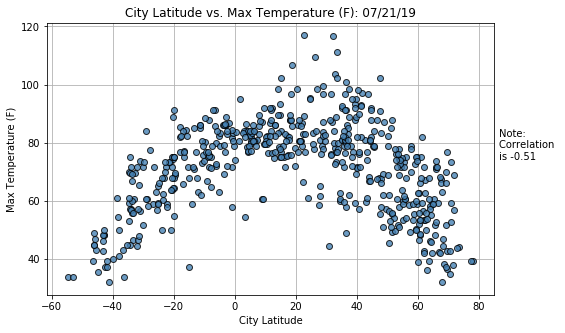

In [7]:
#run the function for Latitude vs. Temperature
plot_scatter(weather_df, "City Latitude", "Max Temperature (F)")

#### Latitude vs. Humidity Plot

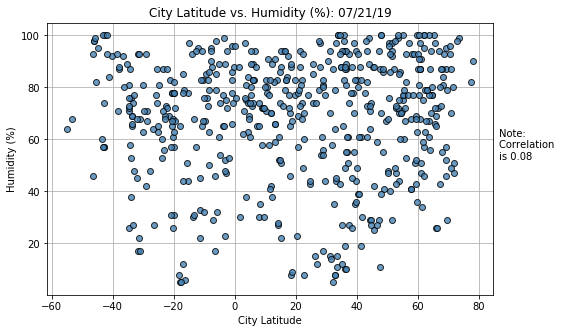

In [8]:
#run the function for Latitude vs. Humidity
plot_scatter(weather_df, "City Latitude", "Humidity (%)")

#### Latitude vs. Cloudiness Plot

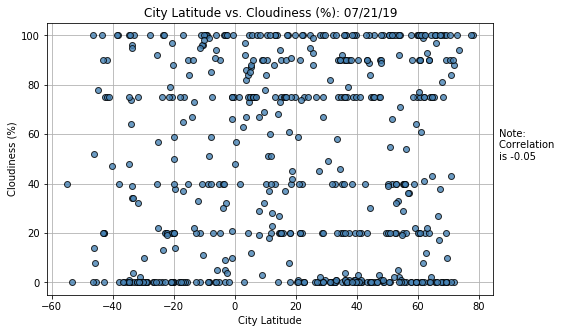

In [9]:
#run the function for Latitude vs. Cloudiness
plot_scatter(weather_df, "City Latitude", "Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

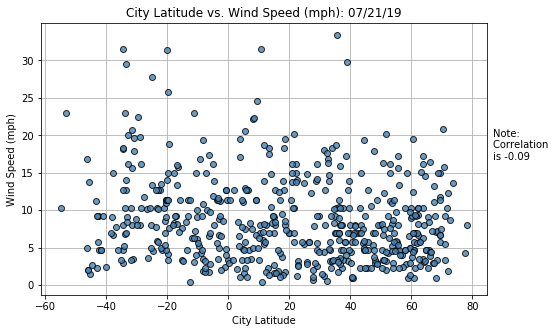

In [10]:
#run the function for Latitude vs. Wind Speed
plot_scatter(weather_df, "City Latitude", "Wind Speed (mph)")

### Observable Trends
1) It does get hotter as we approach the equator! One way to show this is by looking at the Latitude vs. Temperature Scatter Plot above. Another is by finding the correlation between the absolute value of the city latitude and the temperate, which I've included as a "Note" within all the graphs (I used absolute values to get accurate correlations when using latitude). As we can see, there is a moderate to strong negative correlation between latitude and temperature.

2) There are no relationships between latitute and humidity, cloundiness, or windspeed. This is pretty evident from just looking at the 3 other scatter plots, but also by checking the correlations.

3) Despite the point above, it does seem that cities near the equator are more cloudy and more humid (this would perhaps be missed without the data visualization). But this, I would imagine, suggests a relationship between cloudiness and humidity, not latitute. One nice thing about using a function to plot the scatter plots is that I can easily check the relationship between the two very quickly. As we see below, there is definitely a moderate correlation between humidity and cloudiness:

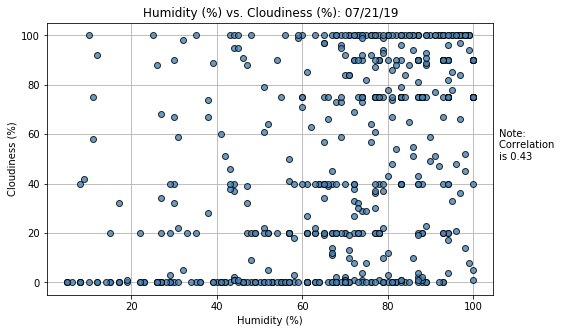

In [11]:
plot_scatter(weather_df, "Humidity (%)", "Cloudiness (%)")